# Sujet : Personnalisation des recommandations des produits dans le cadre d’un site E-commerce

**Réaliser par :**
   *Achraf Akrache* et 
   *Asmae Moubarriz*
- Variable décisionnelle : catégories de produits 
 
- Lien de téléchargement du jeu de données https://www.kaggle.com/datasets/kartikeybartwal/ecommerce-product-recommendation-collaborative 

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
#approche1
from sklearn.linear_model import LogisticRegression
#approche2
from sklearn.neighbors import KNeighborsClassifier
#approche3
from sklearn.tree import DecisionTreeClassifier
#approche4
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

#  I - **Phase d'exploration**

## 1. chargement des donénes depuis le fichier CSV

In [94]:
data = pd.read_csv('user_personalized_features.csv')

- notre dataset est composée de 15 columns dont 9 colomns avec des valeurs numérique .
- notre dataset est de taille 1000 record

In [95]:
data.describe()

,Unnamed: 0,Age,Income,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Time_Spent_on_Site_Minutes,Pages_Viewed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,40.986000,81304.732000,15.586000,4.631000,104.039000,2552.957000,297.360000,24.40300
std,288.819436,13.497852,37363.972753,8.205604,2.837762,54.873569,1420.985048,175.596123,14.02017
min,0.000000,18.000000,20155.000000,1.000000,0.000000,10.000000,112.000000,2.000000,1.00000
25%,249.750000,29.000000,48715.500000,8.000000,2.000000,58.000000,1271.750000,144.000000,12.00000
50%,499.500000,42.000000,81042.000000,16.000000,5.000000,105.000000,2542.000000,292.500000,24.50000
75%,749.250000,52.000000,112694.500000,23.000000,7.000000,150.000000,3835.500000,449.250000,36.00000
max,999.000000,64.000000,149951.000000,29.000000,9.000000,199.000000,4999.000000,599.000000,49.00000


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   1000 non-null   int64 
 1   User_ID                      1000 non-null   object
 2   Age                          1000 non-null   int64 
 3   Gender                       1000 non-null   object
 4   Location                     1000 non-null   object
 5   Income                       1000 non-null   int64 
 6   Interests                    1000 non-null   object
 7   Last_Login_Days_Ago          1000 non-null   int64 
 8   Purchase_Frequency           1000 non-null   int64 
 9   Average_Order_Value          1000 non-null   int64 
 10  Total_Spending               1000 non-null   int64 
 11  Product_Category_Preference  1000 non-null   object
 12  Time_Spent_on_Site_Minutes   1000 non-null   int64 
 13  Pages_Viewed                 1000 

## 2. Visualisation des relations entre la variable décisionelle et les autres colonnes

### 2.1. Définition des Variables importants
 (***cette étape génére des variables qui vont être utilisé dans des autres noeuds par la suite***)

In [97]:
categorical_columns = ['Gender', 'Location', 'Interests']
numerical_columns = ['Age', 'Income', 'Last_Login_Days_Ago', 'Purchase_Frequency', 'Average_Order_Value', 
                     'Total_Spending', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed']

target = 'Product_Category_Preference'

### 2.2. Plot pour les colonnes de type Objet 

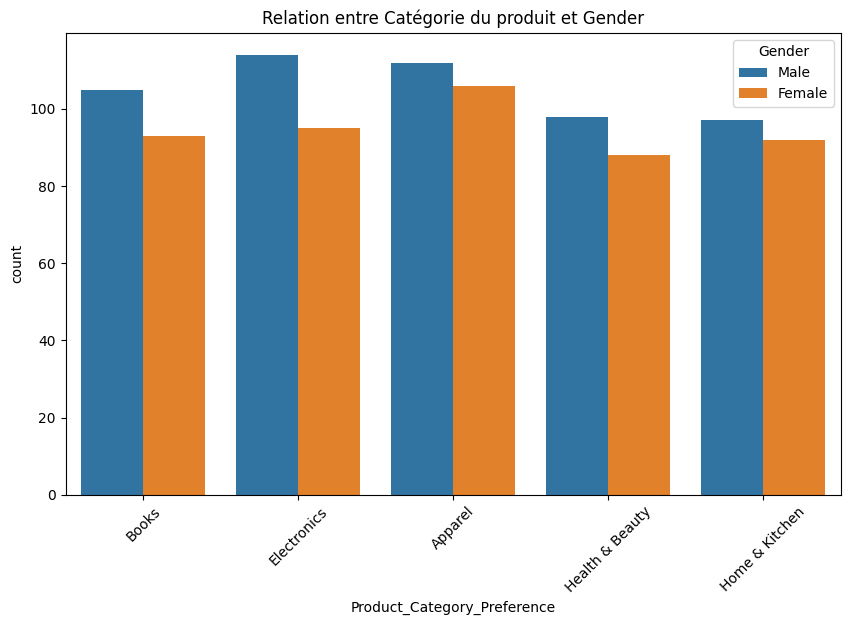

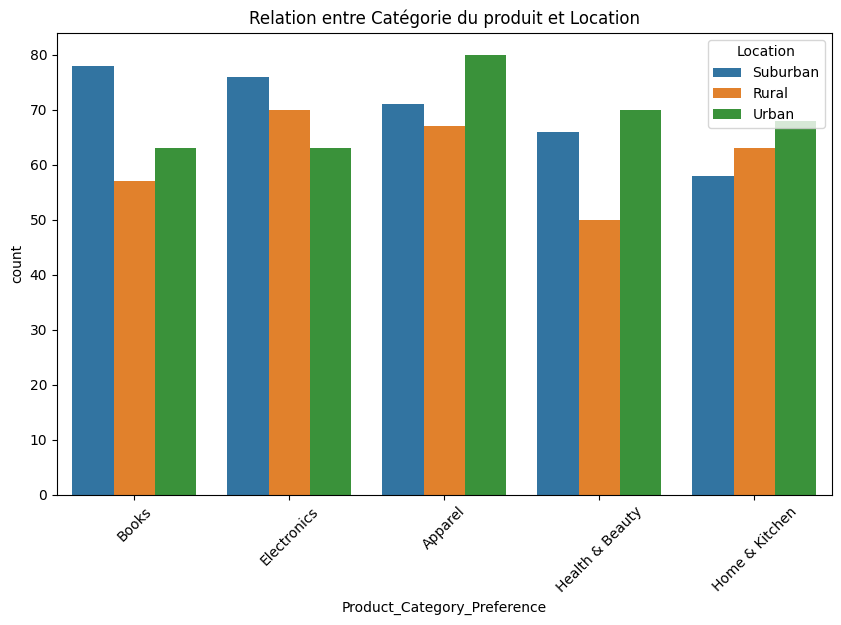

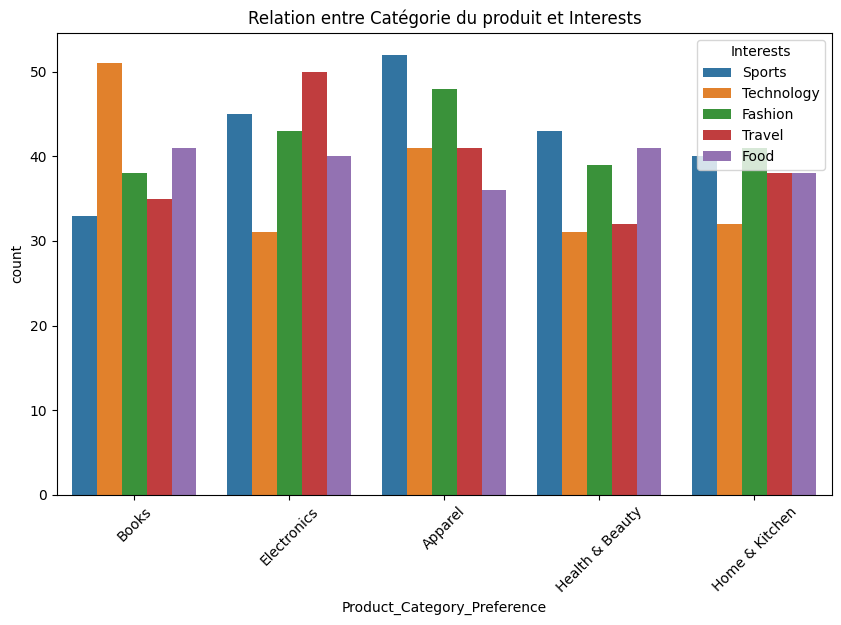

In [98]:
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=target, hue=col)
    plt.title(f'Relation entre Catégorie du produit et {col}')
    plt.xticks(rotation=45)
    plt.show()

### 2.3. Calcule de la corrélation des variables numériques avec la variable décisionelle 

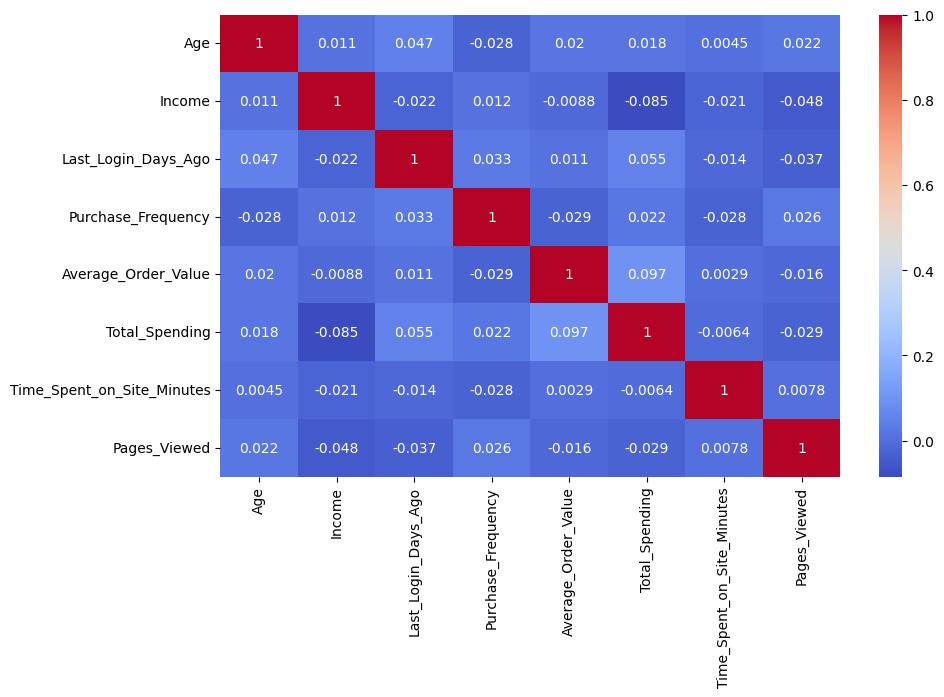

In [99]:
correlation_matrice = data[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrice, annot=True, cmap='coolwarm')
plt.show()

<span style="color: red;"> Remarque : </span>
on remarque que les variables sont  **faiblement** corréler entre eux donc on n'a pas besoin de supprimer aucune colonne

# II - **Phase de pré-traitement des données**

## 1. Vérification des variables aberrantes  

***on remarque la valeur du skewness est presque null dans tous les colonnees ce qui montre l'abscence des valeurs abérantes***

In [100]:
for column in numerical_columns:
    skewness_per_column = data[column].skew()
    print(f"Skewness for {column} is {skewness_per_column}")

Skewness for Age is -0.046883220802412674
Skewness for Income is 0.0985078994287348
Skewness for Last_Login_Days_Ago is -0.0667529892316686
Skewness for Purchase_Frequency is -0.03551313447193858
Skewness for Average_Order_Value is 0.0314231961140403
Skewness for Total_Spending is 0.003128740092689204
Skewness for Time_Spent_on_Site_Minutes is 0.02435168716510395
Skewness for Pages_Viewed is 0.037588211407260146


## 2. Vérification de l'existance des nulls et duplications 

In [101]:
print("Vérification des nulls")
print(data.isnull().sum())
data.dropna(inplace=True)

Vérification des nulls
Unnamed: 0                     0
User_ID                        0
Age                            0
Gender                         0
Location                       0
Income                         0
Interests                      0
Last_Login_Days_Ago            0
Purchase_Frequency             0
Average_Order_Value            0
Total_Spending                 0
Product_Category_Preference    0
Time_Spent_on_Site_Minutes     0
Pages_Viewed                   0
Newsletter_Subscription        0
dtype: int64


In [102]:
print("Vérification des duplications" , data.duplicated().sum())
data.drop_duplicates(inplace=True)

Vérification des duplications 0


## 3. Suppression des colonnes inutiles 

In [103]:
data.drop(['Unnamed: 0' ,'User_ID','Last_Login_Days_Ago','Time_Spent_on_Site_Minutes','Pages_Viewed','Newsletter_Subscription','Average_Order_Value','Purchase_Frequency'], axis=1, inplace=True)

## 4. Sauvegarde dans un nouveaux fichier

In [104]:
data.to_csv('user_personalized_features_cleaned.csv', index=False)
data.empty
data = pd.read_csv('user_personalized_features_cleaned.csv')

## 5. Visualisation des données aprés pré-traitement

In [105]:
data.head()

,Age,Gender,Location,Income,Interests,Total_Spending,Product_Category_Preference
0,56,Male,Suburban,38037,Sports,2546,Books
1,46,Female,Rural,103986,Technology,320,Electronics
2,32,Female,Suburban,101942,Sports,3766,Apparel
3,60,Female,Suburban,71612,Fashion,4377,Apparel
4,25,Male,Suburban,49725,Travel,4502,Health & Beauty


# III- **Phase d'Entrainement**

## **<span style="color: Cyan;">Premier Essai </span>**
- Type d'encodage :  **( Label Encodage )**
- Model essayé : Logistic Regression , Kneighbors  , DecisionTree et RandomForestClassifier

**<span style="color: Red;">Résultat :</span>** accuracy ne dépace pas **25%**

### **<span style="color: Green;">1. Encodage des variables avec *Label Encoding*</span>**

In [106]:
data_label_encoded = data.copy()
data_label_encoded.head()

,Age,Gender,Location,Income,Interests,Total_Spending,Product_Category_Preference
0,56,Male,Suburban,38037,Sports,2546,Books
1,46,Female,Rural,103986,Technology,320,Electronics
2,32,Female,Suburban,101942,Sports,3766,Apparel
3,60,Female,Suburban,71612,Fashion,4377,Apparel
4,25,Male,Suburban,49725,Travel,4502,Health & Beauty


In [107]:
Genderencodage = LabelEncoder()
data_label_encoded['Gender']=Genderencodage.fit_transform(data_label_encoded['Gender'])
Locationencodage = LabelEncoder()
data_label_encoded['Location']=Locationencodage.fit_transform(data_label_encoded['Location'])
Interestsencodage = LabelEncoder()
data_label_encoded['Interests']=Interestsencodage.fit_transform(data_label_encoded['Interests'])
data_label_encoded.head()

,Age,Gender,Location,Income,Interests,Total_Spending,Product_Category_Preference
0,56,1,1,38037,2,2546,Books
1,46,0,0,103986,3,320,Electronics
2,32,0,1,101942,2,3766,Apparel
3,60,0,1,71612,0,4377,Apparel
4,25,1,1,49725,4,4502,Health & Beauty


### **<span style="color: Green;">2. Feature Engineering </span>**

- on definie le X , qui est le dataset sans la variable decisionnelle (Product_category_preference)

- on definie le y qui est la colonne de la variable décisionnelle (Product_category_preference)

In [108]:
X= data_label_encoded.drop(columns=['Product_Category_Preference'])
y = data_label_encoded['Product_Category_Preference'] 

In [109]:
scaler = StandardScaler()
X[['Age', 'Income', 'Total_Spending']] = scaler.fit_transform(
    X[['Age', 'Income', 'Total_Spending']]
)

### **<span style="color: Green;">3. Split des valeurs test et entrainement </span>**

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **<span style="color: Green;">4. Balancing Data </span>**

In [111]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

### **<span style="color: Green;">5. Premiére Approche (Logistic Regression)</span>**
- On utilise Logistic regression comme modèle de classification.
- Idéal pour les relations linéaires.
- Facile à mettre en œuvre et à interpréter.
- Gère la classification multiclasse à l’aide d’une stratégie **multinomiale**.

**Exemple**

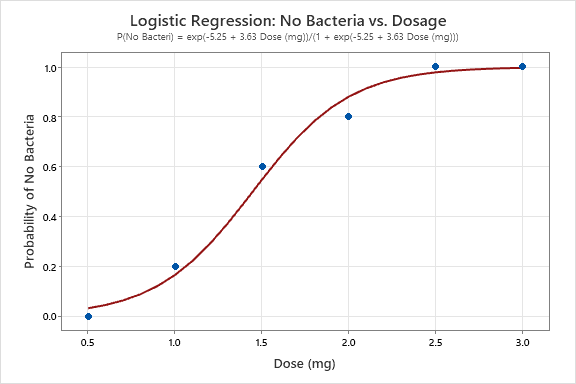

#### **<span style="color: Orange;">Logistic Regression Model</span>**

In [112]:
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train_balanced, y_train_balanced)

LogisticRegression()

#### **<span style="color: Orange;">Phase de Test</span>**

**Classification Report**

In [113]:
y_pred = LogisticRegressionModel.predict(X_test)
print("LogisticRegressionModel")
print(classification_report(y_test, y_pred))


LogisticRegressionModel
                 precision    recall  f1-score   support

        Apparel       0.11      0.05      0.07        39
          Books       0.09      0.12      0.10        34
    Electronics       0.28      0.23      0.25        44
Health & Beauty       0.15      0.16      0.15        38
 Home & Kitchen       0.18      0.24      0.21        45

       accuracy                           0.17       200
      macro avg       0.16      0.16      0.16       200
   weighted avg       0.17      0.17      0.16       200



**Cross Validation**

In [114]:
cv_scores = cross_val_score(LogisticRegressionModel, X_train_balanced, y_train_balanced, cv=5)
print("Max cross-validation score:", np.max(cv_scores))
print("Mean cross-validation score:", np.mean(cv_scores))

Max cross-validation score: 0.22905027932960895
Mean cross-validation score: 0.18994413407821228


#### **<span style="color: Orange;">Synthése de la Logistic Regression</span>**
On tombe dans le cas du underfiting ce qui nous a pousser à migrer à un model plus complexe que la regression logistic.
Ainsi , on a opté à utiliser un modéle plus complexe comme Kneighbors pour que les classes de sortie tissent les liens avec leur voisin

### **<span style="color: Green;">6. Deuxiéme Approche (KNeighbors)</span>**

- On utilise KNeighbors comme modèle de classification.
- Il capture les relations non linéaires entre les classes.
- Facile à comprendre et à interpréter.
- Fonctionne bien sur les ensembles de données petits à moyens.

**Exemple**

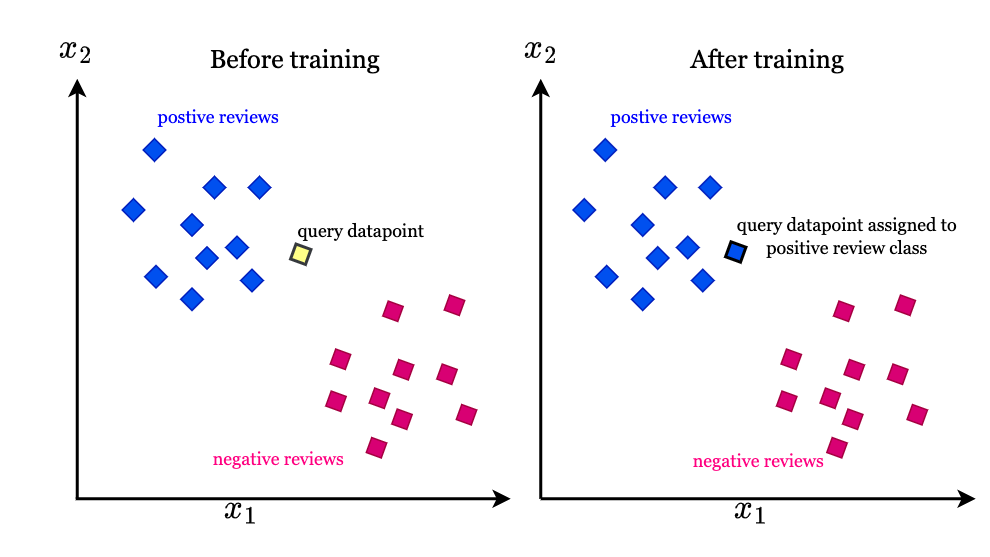

#### **<span style="color: Orange;">KNeighbors Classifier Model</span>**

In [115]:
KnnModel = KNeighborsClassifier(n_neighbors=5)
KnnModel.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier()

#### **<span style="color: Orange;">Phase de test du Kneighbors Model</span>**

**Classification Report**

In [116]:
y_pred = KnnModel.predict(X_test)
print("KnnModel")
print(classification_report(y_test, y_pred))

KnnModel
                 precision    recall  f1-score   support

        Apparel       0.18      0.28      0.22        39
          Books       0.13      0.12      0.12        34
    Electronics       0.22      0.18      0.20        44
Health & Beauty       0.16      0.18      0.17        38
 Home & Kitchen       0.25      0.16      0.19        45

       accuracy                           0.18       200
      macro avg       0.19      0.18      0.18       200
   weighted avg       0.19      0.18      0.18       200



**Cross Validation**

In [117]:
cv_scores = cross_val_score(KnnModel, X_train_balanced, y_train_balanced, cv=5)
print("Max cross-validation score:", np.max(cv_scores))
print("Mean cross-validation score:", np.mean(cv_scores))

Max cross-validation score: 0.39664804469273746
Mean cross-validation score: 0.26033519553072626


### **<span style="color: Green;">7. Troisieme Approche (Arbre de décision) </span>**

- On utilise Decision Tree comme modèle de classification.
- Il capture les relations non linéaires entre les classes .
- Facile à visualiser et à interpréter.
- Fonctionne bien sur les ensembles de données petits à moyens.

**Exemple**

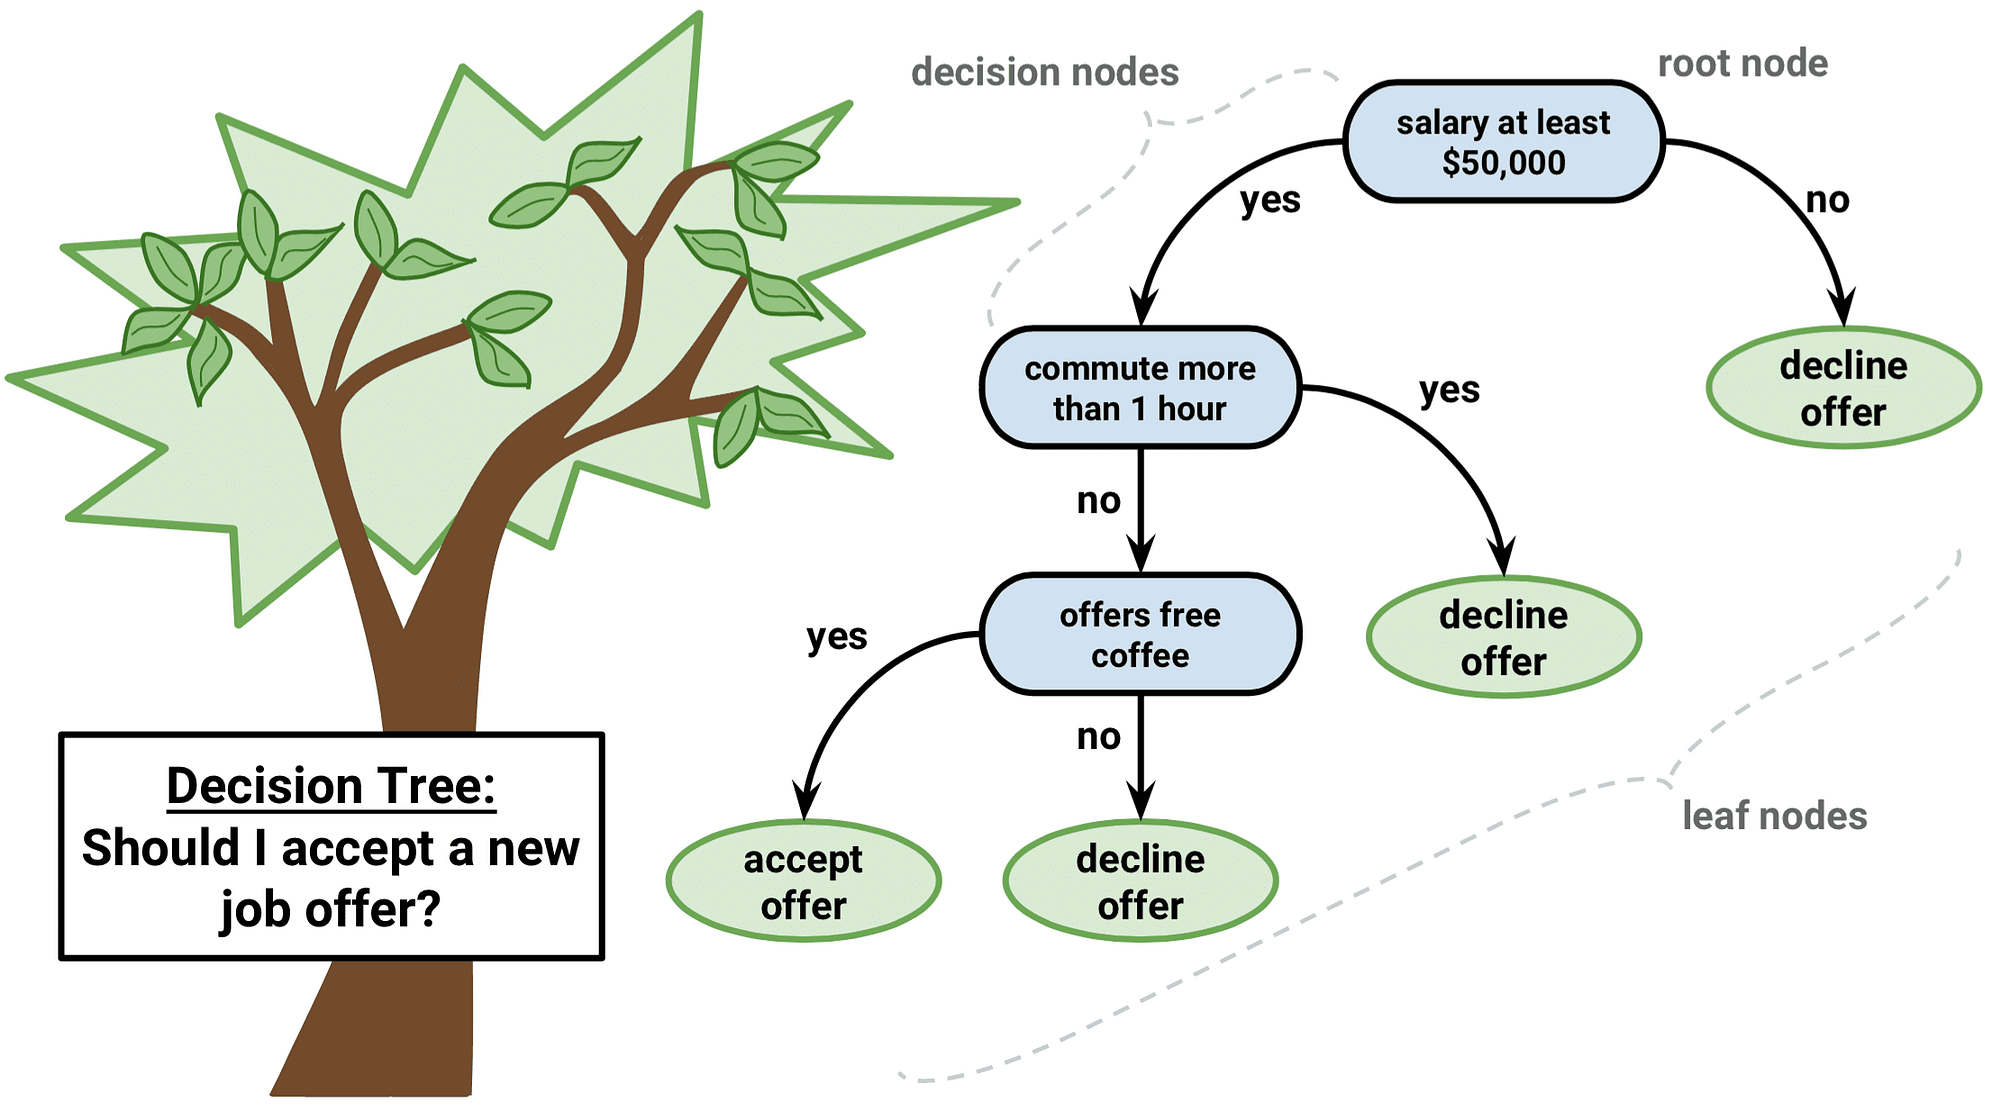


#### **<span style="color: Orange;">Decision Tree Classifier Model</span>**


In [118]:
DecisionTreeClassifierModel =DecisionTreeClassifier(
    max_depth=30, min_samples_split=5, random_state=42
)
DecisionTreeClassifierModel.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(max_depth=30, min_samples_split=5, random_state=42)

#### **<span style="color: Orange;">Phase Test du Modele Decision Tree</span>**

**Classification Report**

In [119]:
y_pred = DecisionTreeClassifierModel.predict(X_test)
print("DecisionTreeClassifierModel")
print(classification_report(y_test, y_pred))

DecisionTreeClassifierModel
                 precision    recall  f1-score   support

        Apparel       0.17      0.23      0.20        39
          Books       0.21      0.26      0.24        34
    Electronics       0.14      0.11      0.13        44
Health & Beauty       0.24      0.24      0.24        38
 Home & Kitchen       0.18      0.13      0.15        45

       accuracy                           0.19       200
      macro avg       0.19      0.20      0.19       200
   weighted avg       0.19      0.19      0.19       200



**Cross Validation**

In [120]:
cv_scores = cross_val_score(DecisionTreeClassifierModel, X_train_balanced, y_train_balanced, cv=5)
print("Max cross-validation score:", np.max(cv_scores))
print("Mean cross-validation score:", np.mean(cv_scores))

Max cross-validation score: 0.3016759776536313
Mean cross-validation score: 0.2525139664804469


#### **<span style="color: Orange;">Synthése du Model Décision Tree</span>**
on remarque que le score de Accuracy a effectivement augmenté . A fin d'augmenter d'avantage ce score on fait recours à un model plus complexe qui ce dérive du model Decision Tree

### **<span style="color: Green;">8. Quatriéme Approche (Random Forest Classifier) </span>**

- Le **Random Forest Classifier** offre une grande précision en combinant plusieurs arbres de décision, réduisant ainsi le risque de surapprentissage. 
- Il est capable de traiter des données mixtes (catégoriques et numériques) et reste robuste face aux données manquantes.
- Il permet d'identifier les caractéristiques les plus importantes pour les prédictions, rendant le modèle interprétable.

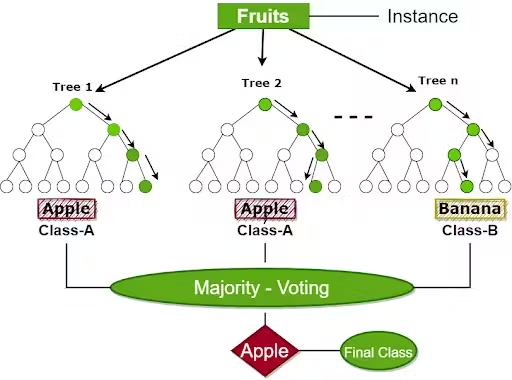


#### **<span style="color: Orange;">Random Forest Classifier Model</span>**

In [121]:
RandomForestClassifierModel = RandomForestClassifier(
    max_depth=3
)
RandomForestClassifierModel.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(max_depth=3)

#### **<span style="color: Orange;">Phase Test du Modele Random Forest Classifier</span>**

**Classification Report**

In [122]:
y_pred = RandomForestClassifierModel.predict(X_test)
print("RandomForestClassifierModel")
print(classification_report(y_test, y_pred))

RandomForestClassifierModel
                 precision    recall  f1-score   support

        Apparel       0.17      0.10      0.13        39
          Books       0.23      0.21      0.22        34
    Electronics       0.32      0.48      0.39        44
Health & Beauty       0.26      0.21      0.23        38
 Home & Kitchen       0.26      0.29      0.27        45

       accuracy                           0.27       200
      macro avg       0.25      0.26      0.25       200
   weighted avg       0.25      0.27      0.25       200



**Classification Report**

In [123]:
cv_scores = cross_val_score(RandomForestClassifierModel, X_train_balanced, y_train_balanced, cv=5)
print("Max cross-validation score:", np.max(cv_scores))
print("Mean cross-validation score:", np.mean(cv_scores))

Max cross-validation score: 0.26256983240223464
Mean cross-validation score: 0.1988826815642458


#### **<span style="color: Orange;">Synthése du Model Random Forest Classifier</span>**
on remarque que le score de Accuracy a effectivement augmenté , Mais ça reste dans les environs des vingtaines ce qui nous à pousser à poser l'hypothése de changer l'encodage des variables 

## **<span style="color: Cyan;">2éme Essai </span>**
- Type d'encodage :  **( One-Hot Encoding and Label Encoding )**
- Model essayé : Kneighbors  , DecisionTree , RandomForestClassifier

**<span style="color: Red;">Résultat :</span>** accuracy ne dépace pas **30%**

### **<span style="color: Green;">1. Encodage des variables avec *One-Hot Encoding*</span>**

In [124]:
data_onehot_encoded = data.copy()
data_onehot_encoded.head()

,Age,Gender,Location,Income,Interests,Total_Spending,Product_Category_Preference
0,56,Male,Suburban,38037,Sports,2546,Books
1,46,Female,Rural,103986,Technology,320,Electronics
2,32,Female,Suburban,101942,Sports,3766,Apparel
3,60,Female,Suburban,71612,Fashion,4377,Apparel
4,25,Male,Suburban,49725,Travel,4502,Health & Beauty


In [125]:
#Gender Label Encoding
Genderencodage = LabelEncoder()
data_onehot_encoded['Gender']=Genderencodage.fit_transform(data_onehot_encoded['Gender'])
#Interests and Location Label Encoding 
data_onehot_encoded = pd.get_dummies(data_onehot_encoded, columns=['Interests','Location'])
data_onehot_encoded.head()

,Age,Gender,Income,Total_Spending,Product_Category_Preference,Interests_Fashion,Interests_Food,Interests_Sports,Interests_Technology,Interests_Travel,Location_Rural,Location_Suburban,Location_Urban
0,56,1,38037,2546,Books,False,False,True,False,False,False,True,False
1,46,0,103986,320,Electronics,False,False,False,True,False,True,False,False
2,32,0,101942,3766,Apparel,False,False,True,False,False,False,True,False
3,60,0,71612,4377,Apparel,True,False,False,False,False,False,True,False
4,25,1,49725,4502,Health & Beauty,False,False,False,False,True,False,True,False


### **<span style="color: Green;">2. Feature Engineering </span>**

- on definie le X , qui est le dataset sans la variable decisionnelle (Product_category_preference)

- on definie le y qui est la colonne de la variable décisionnelle (Product_category_preference)

In [126]:
X.empty
y.empty
X= data_onehot_encoded.drop(columns=['Product_Category_Preference'])
y = data_onehot_encoded['Product_Category_Preference'] 

In [127]:
scaler = StandardScaler()
X[['Age', 'Income', 'Total_Spending']] = scaler.fit_transform(
    X[['Age', 'Income',  'Total_Spending']]
)

### **<span style="color: Green;">3. Split des valeurs test et entrainement </span>**

In [128]:
X_train.empty
X_test.empty
y_train.empty
y_test.empty
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### **<span style="color: Green;">4. Balancing Data </span>**

In [129]:
X_train_balanced.empty
y_train_balanced.empty
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

### **<span style="color: Green;">5. Premiére Approche (KNeighbors)</span>**

#### **<span style="color: Orange;">KNeighbors Classifier Model</span>**

In [130]:
KnnModel = KNeighborsClassifier(
    metric='manhattan',
    n_neighbors=3,
    weights='distance'
    )
KnnModel.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

#### **<span style="color: Orange;">Phase de test du Kneighbors Model</span>**

**Classification Report**

In [131]:
y_pred = KnnModel.predict(X_test)
print("KnnModel")
print(classification_report(y_test, y_pred))

KnnModel
                 precision    recall  f1-score   support

        Apparel       0.15      0.17      0.16        35
          Books       0.19      0.29      0.23        35
    Electronics       0.17      0.12      0.14        40
Health & Beauty       0.26      0.23      0.25        43
 Home & Kitchen       0.16      0.13      0.14        47

       accuracy                           0.18       200
      macro avg       0.18      0.19      0.18       200
   weighted avg       0.19      0.18      0.18       200



**Cross Validation**

In [132]:
cv_scores = cross_val_score(KnnModel, X_train_balanced, y_train_balanced, cv=5)
print("Max cross-validation score:", np.max(cv_scores))
print("Mean cross-validation score:", np.mean(cv_scores))

Max cross-validation score: 0.5956284153005464
Mean cross-validation score: 0.32459016393442625


### **<span style="color: Green;">6. Deuxieme Approche (Arbre de décision) </span>**


#### **<span style="color: Orange;">Decision Tree Classifier Model</span>**


In [133]:
DecisionTreeClassifierModel =DecisionTreeClassifier(
        max_depth=30,
  min_samples_leaf= 2, 
  min_samples_split= 5,

)
DecisionTreeClassifierModel.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5)

#### **<span style="color: Orange;">Phase Test du Modele Decision Tree</span>**

**Classification Report**

In [134]:
y_pred = DecisionTreeClassifierModel.predict(X_test)
print("DecisionTreeClassifierModel")
print(classification_report(y_test, y_pred))

DecisionTreeClassifierModel
                 precision    recall  f1-score   support

        Apparel       0.11      0.23      0.15        35
          Books       0.13      0.17      0.15        35
    Electronics       0.11      0.07      0.09        40
Health & Beauty       0.28      0.19      0.22        43
 Home & Kitchen       0.29      0.17      0.21        47

       accuracy                           0.17       200
      macro avg       0.18      0.17      0.17       200
   weighted avg       0.19      0.17      0.17       200



**Cross Validation**

In [135]:
cv_scores = cross_val_score(DecisionTreeClassifierModel, X_train_balanced, y_train_balanced, cv=5)
print("Max cross-validation score:", np.max(cv_scores))
print("Mean cross-validation score:", np.mean(cv_scores))

Max cross-validation score: 0.3333333333333333
Mean cross-validation score: 0.253551912568306


### **<span style="color: Green;">7. Troisiéme Approche (Random Forest Classifier) </span>**

#### **<span style="color: Orange;">Random Forest Classifier Model</span>**

In [136]:
RandomForestClassifierModel = RandomForestClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
)
RandomForestClassifierModel.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier()

#### **<span style="color: Orange;">Phase Test du Model Random Forest Classifier</span>**

**Classification Report**

In [137]:
y_pred = RandomForestClassifierModel.predict(X_test)
print("RandomForestClassifierModel")
print(classification_report(y_test, y_pred))

RandomForestClassifierModel
                 precision    recall  f1-score   support

        Apparel       0.13      0.20      0.16        35
          Books       0.16      0.23      0.19        35
    Electronics       0.17      0.15      0.16        40
Health & Beauty       0.23      0.21      0.22        43
 Home & Kitchen       0.25      0.13      0.17        47

       accuracy                           0.18       200
      macro avg       0.19      0.18      0.18       200
   weighted avg       0.19      0.18      0.18       200



**Cross Validation**

In [138]:
cv_scores = cross_val_score(RandomForestClassifierModel, X_train_balanced, y_train_balanced, cv=5)
print("Max cross-validation score:", np.max(cv_scores))
print("Mean cross-validation score:", np.mean(cv_scores))

Max cross-validation score: 0.6010928961748634
Mean cross-validation score: 0.326775956284153


#### **<span style="color: Orange;">Synthése de tous les approches du deuxiéme essai</span>**

On remarque que les modeles Random Forest Classifier , KNN sont les modéles les plus optmale pour notre cas de classification de **catégorie de produit** , vu qu'ils donnent le score le plus elevée avec la validation croisée